In [1]:
import megatron as me
from scipy.sparse import load_npz
import time

/Users/huidong/anaconda3/envs/env_megatron/lib/python3.7/site-packages/umap/__init__.py:9: UserWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn("Tensorflow not installed; ParametricUMAP will be unavailable")


In [2]:
me.__version__

'0.1a'

In [3]:
workdir = 'result_celltagging'
me.settings.set_workdir(workdir)

Saving results in: result_celltagging


In [4]:
me.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})

In [5]:
adata = me.read_h5ad('rnaseq_biddy18.h5ad')
adata

AnnData object with n_obs × n_vars = 18076 × 28001
    obs: 'nGene', 'nUMI', 'CellCycle', 'percent.mito', 'Replicate', 'Day', 'Timepoint', 'Reprogramming.Day', 'Outcome', 'Cluster.Seurat', 'State.Monocle', 'CellType.Monocle', 'Pseudotime.Monocle', 'Selected.Clones', 'CellTag.Version', 'Seurat', 'Monocle', 'Tag_0', 'Tag_3', 'Tag_13', 'tSNE_1', 'tSNE_2', 'Component.1', 'Component.2'
    var: 'symbol'
    obsm: 'X_tsne_paper'

In [6]:
mat_clone = load_npz('clone_traj_biddy18.npz')
mat_clone

<18076x1890 sparse matrix of type '<class 'numpy.int64'>'
	with 33901 stored elements in Compressed Sparse Row format>

In [7]:
me.pp.add_clones(adata, 
                 mat=mat_clone)
adata

AnnData object with n_obs × n_vars = 18076 × 28001
    obs: 'nGene', 'nUMI', 'CellCycle', 'percent.mito', 'Replicate', 'Day', 'Timepoint', 'Reprogramming.Day', 'Outcome', 'Cluster.Seurat', 'State.Monocle', 'CellType.Monocle', 'Pseudotime.Monocle', 'Selected.Clones', 'CellTag.Version', 'Seurat', 'Monocle', 'Tag_0', 'Tag_3', 'Tag_13', 'tSNE_1', 'tSNE_2', 'Component.1', 'Component.2'
    var: 'symbol'
    uns: 'clone'
    obsm: 'X_tsne_paper', 'X_clone'

In [8]:
me.pp.filter_clones(adata,min_cells=1)
adata

Before filtering: 1890 clones
After filtering: 1890 clones


AnnData object with n_obs × n_vars = 18076 × 28001
    obs: 'nGene', 'nUMI', 'CellCycle', 'percent.mito', 'Replicate', 'Day', 'Timepoint', 'Reprogramming.Day', 'Outcome', 'Cluster.Seurat', 'State.Monocle', 'CellType.Monocle', 'Pseudotime.Monocle', 'Selected.Clones', 'CellTag.Version', 'Seurat', 'Monocle', 'Tag_0', 'Tag_3', 'Tag_13', 'tSNE_1', 'tSNE_2', 'Component.1', 'Component.2'
    var: 'symbol'
    uns: 'clone'
    obsm: 'X_tsne_paper', 'X_clone'

In [9]:
adata.obs['Cluster.Seurat'] = adata.obs['Cluster.Seurat'].astype(str)

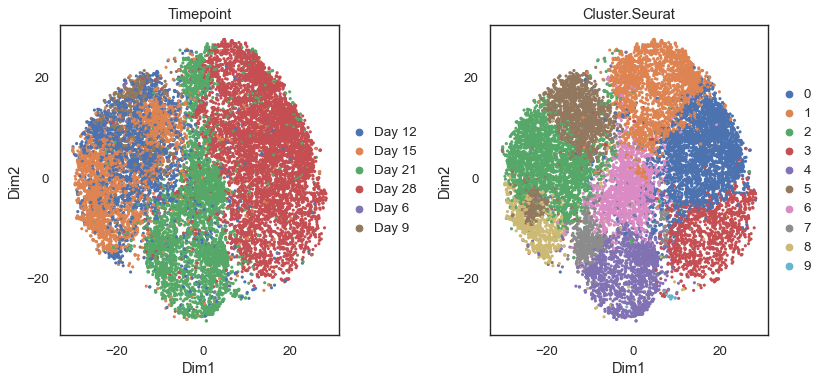

In [10]:
me.pl.scatter(adata, 
              color=['Timepoint','Cluster.Seurat'],
              drawing_order='random',
              obsm='X_tsne_paper')

In [12]:
st = time.time()
me.tl.clone_distance(adata,
                     method='geodesic',
                     obsm='X_tsne_paper',
                     anno_time='Day',
                     n_jobs=20)
ed = time.time()

Finished: 6.245521716276804 mins


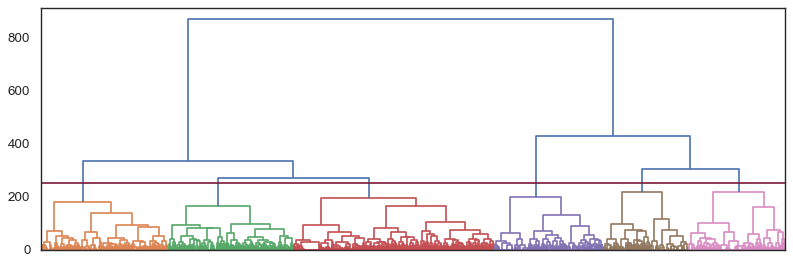

In [21]:
me.pl.clone_dendrogram(adata, color_threshold=250)

In [22]:
me.tl.cluster_clones(adata,
                     n_clusters=6,
                     method='hierarchical')

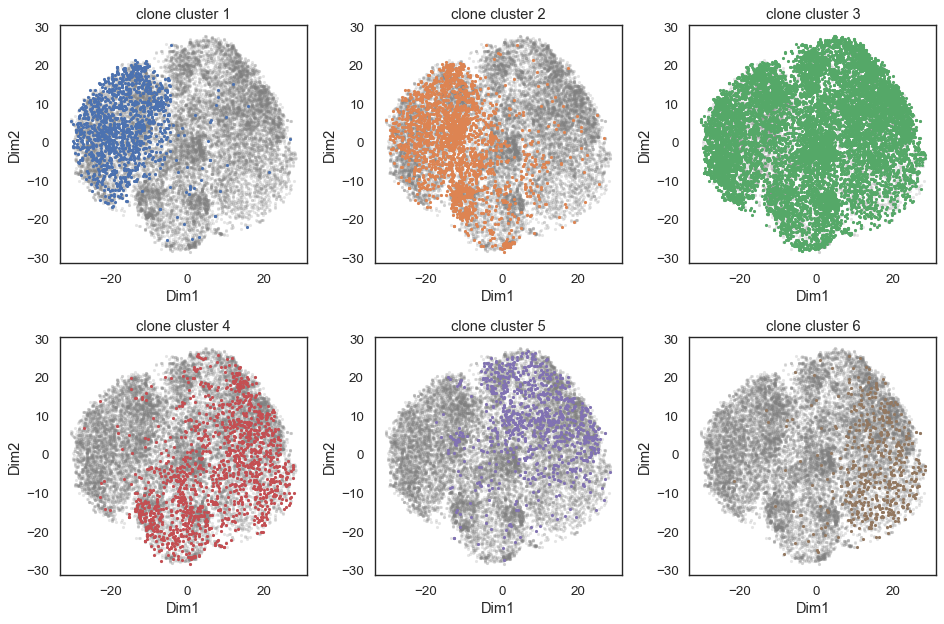

In [23]:
me.pl.clone_clusters(adata, group='hierarchical', obsm='X_tsne_paper',
                    show_contour=False, 
                    levels=5, thresh=0.1,fig_ncol=3, alpha=1)

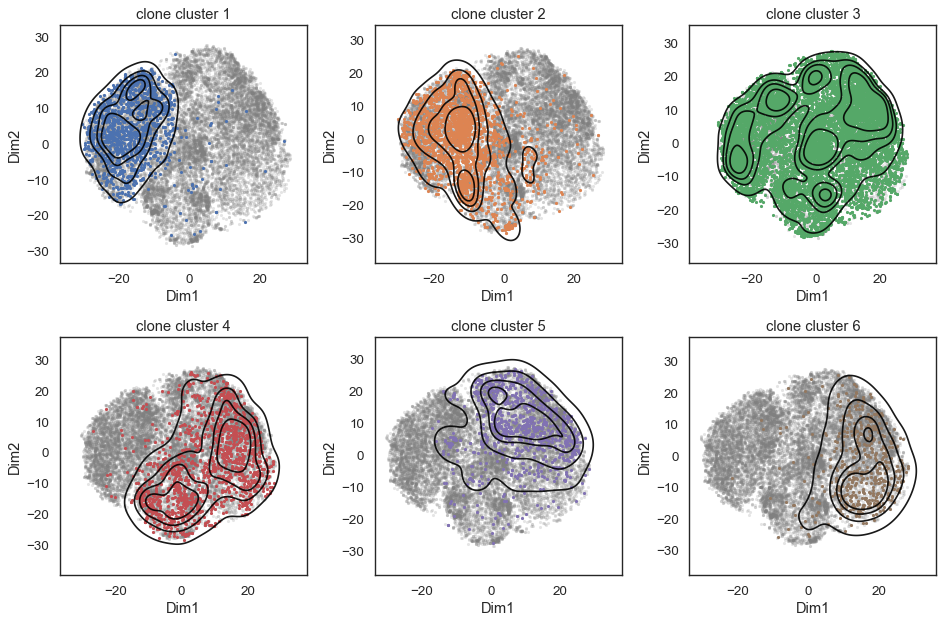

In [25]:
me.pl.clone_clusters(adata, group='hierarchical', obsm='X_tsne_paper',show_contour=True, 
                     levels=5, thresh=0.1,fig_ncol=3, alpha=1)

In [26]:
adata.uns['clone']['anno'].head()

,hierarchical
0,1
1,1
2,6
3,1
4,1


### analysis for cluster 3

```python
import numpy as np
id_clones_x = adata.uns['clone']['anno'][adata.uns['clone']['anno']['hierarchical'] == '3'].index.astype(int)
id_cells_x = np.where(adata.obsm['X_clone'][:, id_clones_x].sum(axis=1).A1>0)[0]
adata_subset = adata[id_cells_x,].copy()
mat_clone_subset = mat_clone[id_cells_x,:][:,id_clones_x].copy()
me.pp.add_clones(adata_subset, 
                 mat=mat_clone_subset)
```

In [80]:
adata_subset = me.tl.subset_clones(adata, anno_value=['3'])
adata_subset

AnnData object with n_obs × n_vars = 12346 × 28001
    obs: 'nGene', 'nUMI', 'CellCycle', 'percent.mito', 'Replicate', 'Day', 'Timepoint', 'Reprogramming.Day', 'Outcome', 'Cluster.Seurat', 'State.Monocle', 'CellType.Monocle', 'Pseudotime.Monocle', 'Selected.Clones', 'CellTag.Version', 'Seurat', 'Monocle', 'Tag_0', 'Tag_3', 'Tag_13', 'tSNE_1', 'tSNE_2', 'Component.1', 'Component.2'
    var: 'symbol'
    uns: 'color', 'clone'
    obsm: 'X_tsne_paper', 'X_clone'

In [81]:
me.pp.filter_clones(adata_subset,min_cells=10)
adata_subset

Before filtering: 510 clones
After filtering: 354 clones


AnnData object with n_obs × n_vars = 12346 × 28001
    obs: 'nGene', 'nUMI', 'CellCycle', 'percent.mito', 'Replicate', 'Day', 'Timepoint', 'Reprogramming.Day', 'Outcome', 'Cluster.Seurat', 'State.Monocle', 'CellType.Monocle', 'Pseudotime.Monocle', 'Selected.Clones', 'CellTag.Version', 'Seurat', 'Monocle', 'Tag_0', 'Tag_3', 'Tag_13', 'tSNE_1', 'tSNE_2', 'Component.1', 'Component.2'
    var: 'symbol'
    uns: 'color', 'clone'
    obsm: 'X_tsne_paper', 'X_clone'

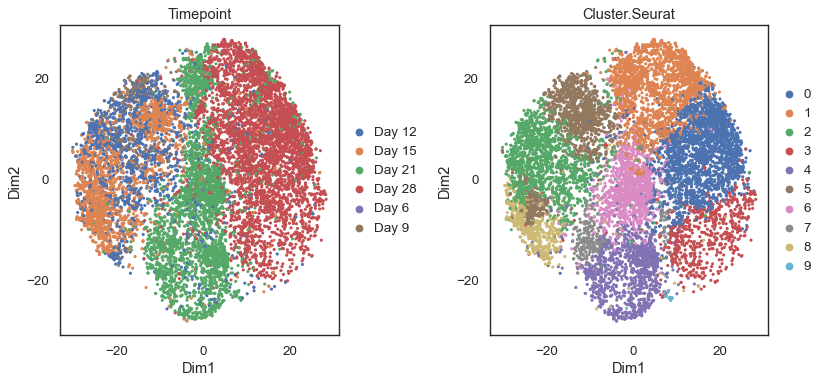

In [82]:
me.pl.scatter(adata_subset, 
              color=['Timepoint','Cluster.Seurat'],
              drawing_order='random',
              obsm='X_tsne_paper')

In [83]:
me.tl.clone_distance(adata_subset,
                     method='geodesic',
                     obsm='X_tsne_paper',
                     anno_time='Day',
                     n_jobs=20)

Finished: 1.903211486339569 mins


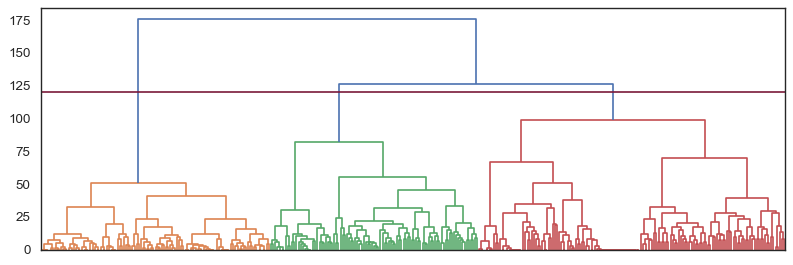

In [86]:
me.pl.clone_dendrogram(adata_subset, color_threshold=120)

In [87]:
me.tl.cluster_clones(adata_subset,
                     n_clusters=3,
                     method='hierarchical')

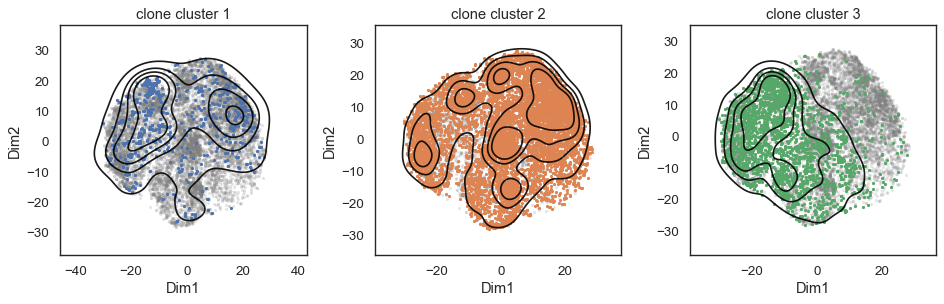

In [88]:
me.pl.clone_clusters(adata_subset, group='hierarchical', obsm='X_tsne_paper',
                     show_contour=True, 
                     levels=5, thresh=0.1,fig_ncol=3, alpha=1)

In [89]:
adata_subset.uns['clone']['anno']

,hierarchical
4,2
5,3
7,3
8,2
9,2
...,...
483,2
487,2
493,2
497,3


In [90]:
adata_subset.uns['clone']['anno'][adata_subset.uns['clone']['anno']['hierarchical']=='1']

,hierarchical
14,1
27,1
99,1
103,1
105,1
...,...
410,1
411,1
414,1
416,1


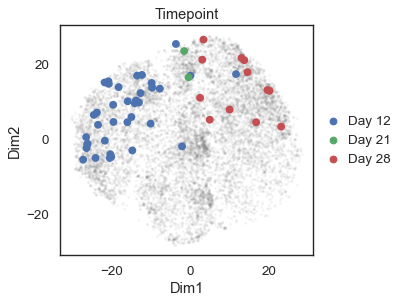

In [94]:
me.pl.clones(adata_subset, 
             ids=['99'], 
             obsm='X_tsne_paper', 
             color=['Timepoint'],
             bg_alpha=0.1,
             fig_size=(5,4),
             show_contour=False)

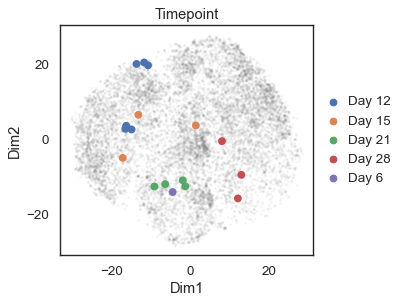

In [95]:
me.pl.clones(adata_subset, 
             ids=['5'], 
             obsm='X_tsne_paper', 
             color=['Timepoint'],
             bg_alpha=0.1,
             fig_size=(5,4),
             show_contour=False)

In [96]:
adata.write('./result_celltagging/adata_celltag.h5ad')
adata_subset.write('./result_celltagging/adata_subset_celltag.h5ad')